In [1]:
library(tidyr)
library(ggplot2)
library(ggpubr)
library(dplyr)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df<-read.csv("05_Correlation_Analysis/selected_pairs.csv",check.names = FALSE)

In [3]:
names(df)[is.na(names(df)) | names(df) == ""] <- paste0("V", which(is.na(names(df)) | names(df) == ""))

In [4]:
df_filtered <- df %>% filter(rowSums(is.na(.)) == 0)

In [5]:
df_filtered<-df_filtered %>% filter (!(variable=="IgG2_to_Total_Ratio_D0_Phuket_2020-2021" &value>0.015))

In [6]:
unique(df_filtered$variable )

[1] "Cytokine_Profiling_IL4_4hr"                  
[2] "Unstimulated-IFNg- IL4+ CD27+ CM Memory CD4+"
[3] "IgG2_to_Total_Ratio_D0_Phuket_2020-2021"

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


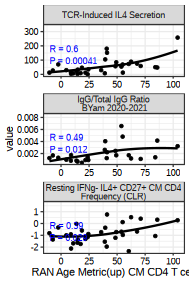

In [13]:


options(repr.plot.width = 40/25.4, repr.plot.height =  60/25.4)

p <- ggplot(df_filtered, aes(x = `CompositeScore_Up_CM CD4 T cell`, y = value)) +
  geom_point(size = 0.6, stroke = 0.25) +
  geom_smooth(method = 'loess', color = "black", se = FALSE,span = 1.8, linewidth = 0.5) +
  stat_cor(
    method = "spearman",
    aes(label = paste0("R = ", ..r.., "\nP = ", ..p..)),
    label.x.npc = "left", 
    label.y.npc = "top",   output.type = "text",
color ="blue",
    size = 1.76
  ) +
  facet_wrap(~ variable, ncol = 1, scales = "free",labeller = labeller(variable = c(
    "Cytokine_Profiling_IL4_4hr" = "TCR-Induced IL4 Secretion",
      "IgG2_to_Total_Ratio_D0_Phuket_2020-2021"="IgG/Total IgG Ratio\n BYam 2020-2021",
      "Unstimulated-IFNg- IL4+ CD27+ CM Memory CD4+"="Resting IFNg- IL4+ CD27+ CM CD4\nFrequency (CLR)"
  ))) +
  theme_bw(base_size = 6) + scale_y_continuous(expand = expansion(mult = c(0.05, 0.35))) + theme(
  axis.title   = element_text(color = "black"),
  axis.text    = element_text(color = "black"),
    strip.text.x      = element_text(margin = margin(t = 1, b = 1))


)+xlab("RAN Age Metric(up) CM CD4 T cell")

p
ggsave('FigureJ.pdf',
       p, 
       width = 45/25.4,
       height = 60/25.4)